In [1]:
from __future__ import (division, unicode_literals, absolute_import,
                        print_function)

from ema_workbench import (Model, RealParameter, Constant, CategoricalParameter, 
                           TimeSeriesOutcome, ScalarOutcome, ema_logging, perform_experiments, 
                           MultiprocessingEvaluator, Policy)
from ema_workbench.connectors.vensim import (VensimModel , VensimModelStructureInterface, set_value)
from ema_workbench.em_framework.samplers import sample_levers
from ema_workbench.util.utilities import save_results
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter)
from ema_workbench.analysis import clusterer, plotting, Density, prim
from ema_workbench.analysis.plotting import lines, envelopes, kde_over_time, multiple_densities



import timeit
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from ema_workbench.analysis.plotting import lines

C:\Programs\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:27: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath

In [2]:
data = r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\BaseEnsemble_1000.tar'
results = load_results(data)
experiments_1000, outcomes_1000 = results

In [3]:
data = r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\BaseEnsemble_3000.tar'
results = load_results(data)
experiments_3000, outcomes_3000 = results

In [4]:
data = r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\BaseEnsemble_5000.tar'
results = load_results(data)
experiments_5000, outcomes_5000 = results

In [5]:
data = r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\BaseEnsemble_7000.tar'
results = load_results(data)
experiments_7000, outcomes_7000 = results

In [6]:
data = r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\BaseEnsemble_8000.tar'
results = load_results(data)
experiments_8000, outcomes_8000 = results

In [7]:
data = r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\BaseEnsemble_10000.tar'
results = load_results(data)
experiments_10000, outcomes_10000 = results

In [8]:
data = r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\BaseEnsemble_12000.tar'
results = load_results(data)
experiments_12000, outcomes_12000 = results

In [9]:
outcome = 'Percentage of full fresh water buffer[Weir5]'

In [10]:
fb_1000 = outcomes_1000[outcome]
fb_3000 = outcomes_3000[outcome]
fb_5000 = outcomes_5000[outcome]
fb_7000 = outcomes_7000[outcome]
fb_8000 = outcomes_8000[outcome]
fb_10000 = outcomes_10000[outcome]
fb_12000 = outcomes_12000[outcome]


In [11]:
mins=[np.min(fb_1000),
np.min(fb_3000),
np.min(fb_5000),
np.min(fb_7000),
np.min(fb_8000),
np.min(fb_10000),
np.min(fb_12000)]


In [12]:
means=[
np.mean(fb_1000),
np.mean(fb_3000),
np.mean(fb_5000),
np.mean(fb_7000),
np.mean(fb_8000),
np.mean(fb_10000),
np.mean(fb_12000)]


In [13]:
sizes=     [1000,3000,5000,7000,8000,10000,12000]

C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text xticklabel objects>)

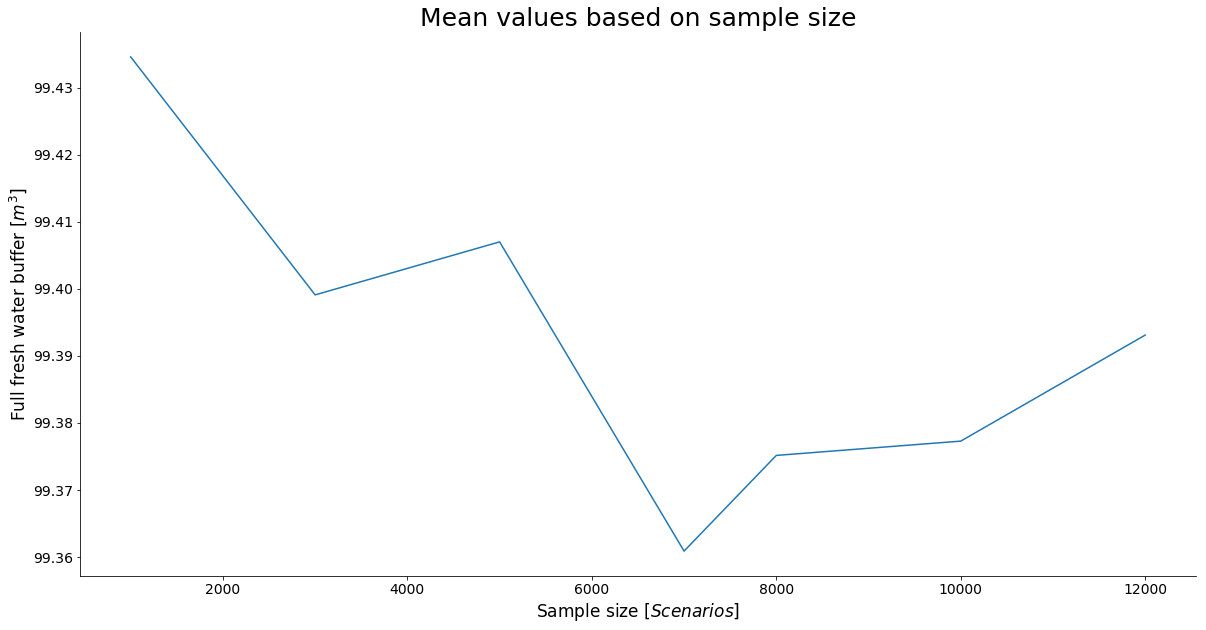

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(sizes,means)
plt.title('Mean values based on sample size', fontsize=25)
plt.ylabel("Full fresh water buffer $[m^3]$", fontsize=17) 
plt.xlabel("Sample size $[Scenarios]$", fontsize=17) 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False) 
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14) 
#plt.axhline(3.6402e8, color = 'black', linestyle = '--', lw=3, alpha=0.3)

C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


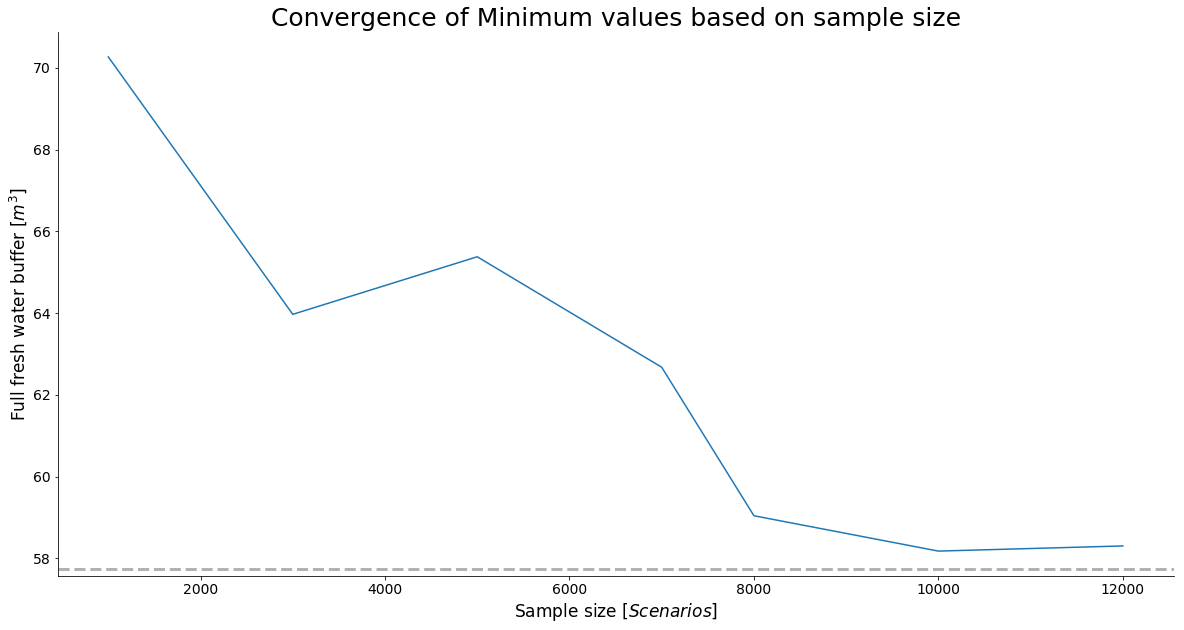

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(sizes,mins)
plt.title('Convergence of Minimum values based on sample size', fontsize=25)
plt.ylabel("Full fresh water buffer $[m^3]$", fontsize=17) 
plt.xlabel("Sample size $[Scenarios]$", fontsize=17) 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False) 
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14) 
plt.axhline(57.75, color = 'black', linestyle = '--', lw=3, alpha=0.3)